In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR

In [4]:
df=pd.read_csv('Data/cars.csv')
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


In [6]:
####  2.1 Univariate Analysis: Histograms and Boxplots

In [11]:
sns.set(style="whitegrid")

In [12]:
num_cols = ['price', 'distance_travelled(kms)', 'car_age', 'brand_rank']

In [13]:
#### # Plot histograms and boxplots for numeric columns

In [14]:
#### # Plot histograms and boxplots for numeric columns

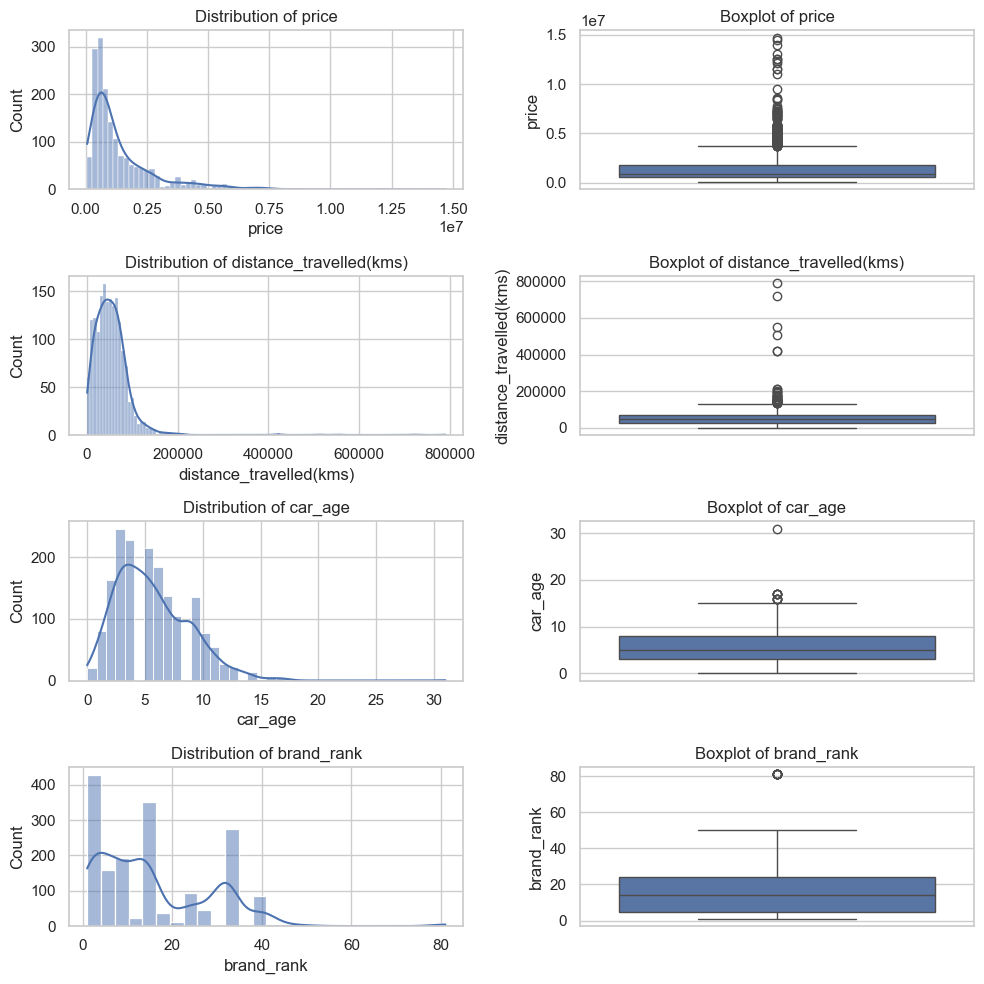

In [16]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(10,10))
for i , col in enumerate(num_cols): 
    sns.histplot(df[col].dropna(),ax=axes[i,0],kde=True)
    axes[i,0].set_title(f'Distribution of {col}')

    sns.boxplot(df[col],ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [17]:
#### Univariate Analysis Observations From the histograms and boxplots

In [18]:
#### 2.2 Multivariate Analysis Compute correlation matrix for numeric columns

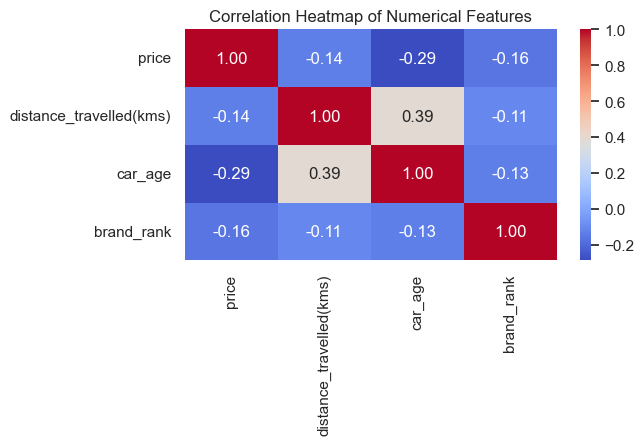

In [20]:
corr=df[num_cols].corr()
# Plot heatmap of the correlation matrix 
plt.figure(figsize=(6,3))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

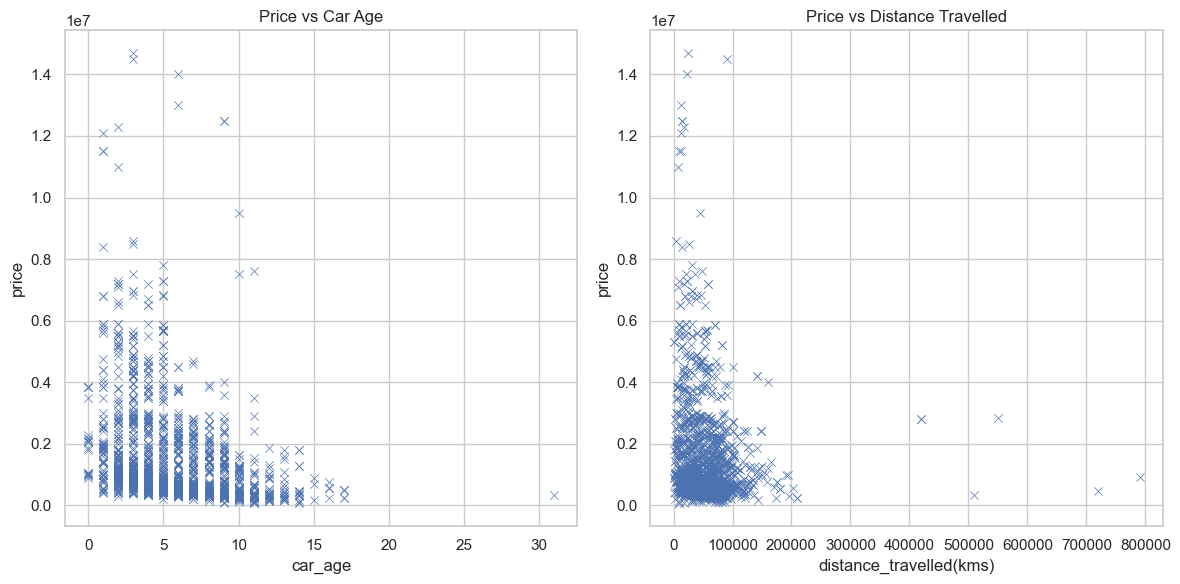

In [22]:
# Scatter plots to visualize pairwise relationship 
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12, 6))

sns.scatterplot(x='car_age',y='price',data=df,ax=axes[0],marker='x')
axes[0].set_title('Price vs Car Age')

sns.scatterplot(x='distance_travelled(kms)', y='price', data=df, ax=axes[1],marker='x')
axes[1].set_title('Price vs Distance Travelled')

plt.tight_layout()
plt.show()

In [23]:
#### Multivariate Analysis Insights

In [25]:
#### 3. Layout regression experiment space

In [31]:
df=pd.read_csv('Data/cars.csv')
X = df[['year', 'brand', 'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank', 'car_age']]
y = df['price']

# Define categorical and numerical columns
categorical_cols = ['brand', 'fuel_type', 'city']
numerical_cols = ['year', 'distance_travelled(kms)', 'brand_rank', 'car_age']

# Preprocessing: One-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as is
)

In [35]:
# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor" : SVR(kernel='rbf', C=100), 
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
}

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
results = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": model_name,
        "MSE": np.rnd(mse, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 2)
    })

# Create a DataFrame of results
results_df = pd.DataFrame(results)
results_df

AttributeError: module 'numpy' has no attribute 'rnd'